In [ ]:
import pandas as pd

df = pd.read_csv("flood.csv")

In [ ]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [ ]:
print(df.isnull().sum())

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


In [ ]:
# Step 3: Define Features and Target
X = df.drop('FloodProbability', axis=1)  # Features (independent variables)
y = df['FloodProbability']  # Target (dependent variable)

In [ ]:
df.shape

(50000, 21)

In [ ]:
df['FloodProbability'] = df['FloodProbability'].apply(lambda x : 1 if x >=0.5 else 0)

In [ ]:
df['FloodProbability'].value_counts()

,count
FloodProbability,
1,25513
0,24487


Confusion Matrix (10-Fold CV on Training Data):
 [[17806  1784]
 [ 2336 18074]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90     19590
           1       0.91      0.89      0.90     20410

    accuracy                           0.90     40000
   macro avg       0.90      0.90      0.90     40000
weighted avg       0.90      0.90      0.90     40000



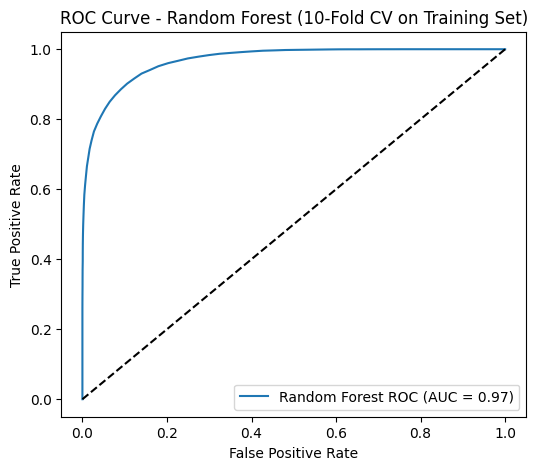

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# === Step 1: Split Train & Test ===
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Step 2: Define Model ===
rf = RandomForestClassifier(random_state=42)

# === Step 3: 10-Fold Cross Validation on Training Set ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validated predictions (labels & probabilities)
y_pred_cv = cross_val_predict(rf, X_train, y_train, cv=cv, method="predict")
y_proba_cv = cross_val_predict(rf, X_train, y_train, cv=cv, method="predict_proba")[:, 1]

# === Step 4: Confusion Matrix & Classification Report ===
print("Confusion Matrix (10-Fold CV on Training Data):\n", confusion_matrix(y_train, y_pred_cv))
print("\nClassification Report:\n", classification_report(y_train, y_pred_cv))

# === Step 5: ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_train, y_proba_cv)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Random Forest ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (10-Fold CV on Training Set)")
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:06:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:06:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:06:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:06:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:06:25] WARNING: /w

Confusion Matrix (10-Fold CV on Training Data):
 [[18190  1400]
 [ 1421 18989]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     19590
           1       0.93      0.93      0.93     20410

    accuracy                           0.93     40000
   macro avg       0.93      0.93      0.93     40000
weighted avg       0.93      0.93      0.93     40000



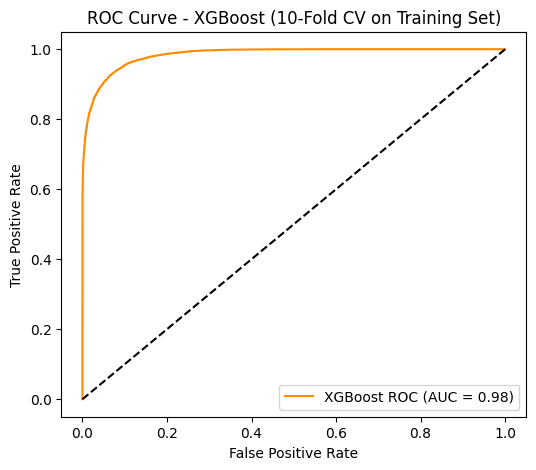

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# === Step 1: Split Train & Test ===
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Step 2: Define Model ===
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# === Step 3: 10-Fold Cross Validation on Training Set ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validated predictions (labels & probabilities)
y_pred_cv = cross_val_predict(xgb, X_train, y_train, cv=cv, method="predict")
y_proba_cv = cross_val_predict(xgb, X_train, y_train, cv=cv, method="predict_proba")[:, 1]

# === Step 4: Confusion Matrix & Classification Report ===
print("Confusion Matrix (10-Fold CV on Training Data):\n", confusion_matrix(y_train, y_pred_cv))
print("\nClassification Report:\n", classification_report(y_train, y_pred_cv))

# === Step 5: ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_train, y_proba_cv)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"XGBoost ROC (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (10-Fold CV on Training Set)")
plt.legend(loc="lower right")
plt.show()


Confusion Matrix (10-Fold CV on Training Data):
 [[19590     0]
 [    0 20410]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19590
           1       1.00      1.00      1.00     20410

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



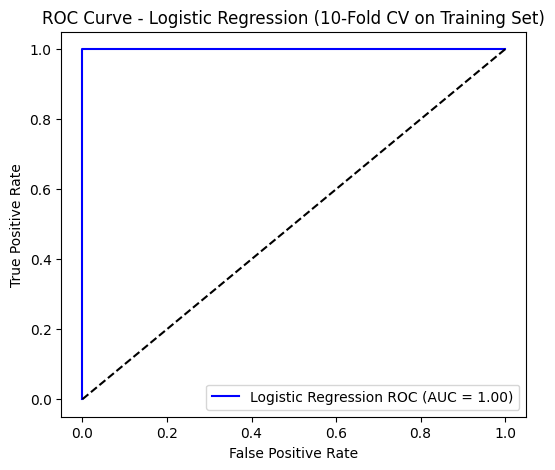

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# === Step 1: Split Train & Test ===
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Step 2: Define Model ===
log_reg = LogisticRegression(
    solver="liblinear",   # good for small/medium datasets & binary classification
    random_state=42
)

# === Step 3: 10-Fold Cross Validation on Training Set ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

y_pred_cv = cross_val_predict(log_reg, X_train, y_train, cv=cv, method="predict")
y_proba_cv = cross_val_predict(log_reg, X_train, y_train, cv=cv, method="predict_proba")[:, 1]

# === Step 4: Confusion Matrix & Classification Report ===
print("Confusion Matrix (10-Fold CV on Training Data):\n", confusion_matrix(y_train, y_pred_cv))
print("\nClassification Report:\n", classification_report(y_train, y_pred_cv))

# === Step 5: ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_train, y_proba_cv)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Logistic Regression ROC (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (10-Fold CV on Training Set)")
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Number of positive: 18369, number of negative: 17631
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 338
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510250 -> initscore=0.041006
[LightGBM] [Info] Start training from score 0.041006
[LightGBM] [Info] Number of positive: 18369, number of negative: 17631
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 339
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510250 -> initscore=0.041006
[LightG

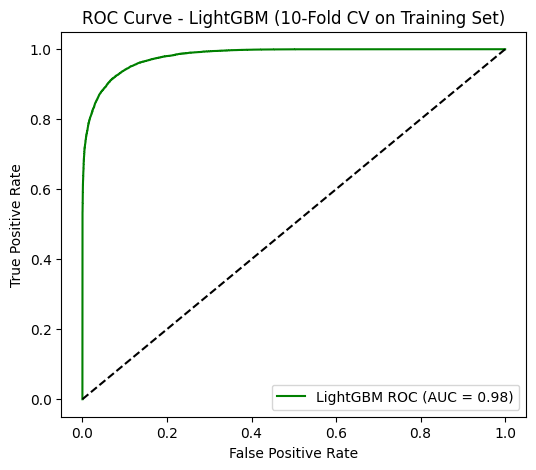

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# === Step 1: Split Train & Test ===
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Step 2: Define Model ===
lgbm = LGBMClassifier(
    random_state=42,
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31
)

# === Step 3: 10-Fold Cross Validation on Training Set ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

y_pred_cv = cross_val_predict(lgbm, X_train, y_train, cv=cv, method="predict")
y_proba_cv = cross_val_predict(lgbm, X_train, y_train, cv=cv, method="predict_proba")[:, 1]

# === Step 4: Confusion Matrix & Classification Report ===
print("Confusion Matrix (10-Fold CV on Training Data):\n", confusion_matrix(y_train, y_pred_cv))
print("\nClassification Report:\n", classification_report(y_train, y_pred_cv))

# === Step 5: ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_train, y_proba_cv)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"LightGBM ROC (AUC = {roc_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM (10-Fold CV on Training Set)")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# === Step 1: Split Train & Test ===
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# === Step 2: Define ANN Model Function ===
def create_ann(input_dim):
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# === Step 3: 10-Fold Cross Validation ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred_cv = np.zeros(len(y_train))
y_proba_cv = np.zeros(len(y_train))

for train_idx, val_idx in cv.split(X_train, y_train):
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    ann_model = create_ann(X_train.shape[1])
    ann_model.fit(X_tr, y_tr, epochs=50, batch_size=16, verbose=0)

    y_proba = ann_model.predict(X_val).flatten()
    y_pred_cv[val_idx] = (y_proba > 0.5).astype(int)
    y_proba_cv[val_idx] = y_proba

# === Step 4: Confusion Matrix & Classification Report ===
print("Confusion Matrix (10-Fold CV on Training Data):\n", confusion_matrix(y_train, y_pred_cv))
print("\nClassification Report:\n", classification_report(y_train, y_pred_cv))

# === Step 5: ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_train, y_proba_cv)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ANN ROC (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN (10-Fold CV on Training Set)")
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


KeyboardInterrupt: 

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8095 - loss: 0.4550 - val_accuracy: 0.9607 - val_loss: 0.1132
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9712 - loss: 0.0924 - val_accuracy: 0.9793 - val_loss: 0.0674
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - loss: 0.0568 - val_accuracy: 0.9831 - val_loss: 0.0542
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0457 - val_accuracy: 0.9847 - val_loss: 0.0488
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0431 - val_accuracy: 0.9849 - val_loss: 0.0467
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9892 - loss: 0.0405 - val_accuracy: 0.9876 - val_loss: 0.0445
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9888 - loss: 0.0388 - val_accuracy: 0.9856 - val_loss: 0.0461
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9910 - loss: 0.0350 - val_accuracy: 0.

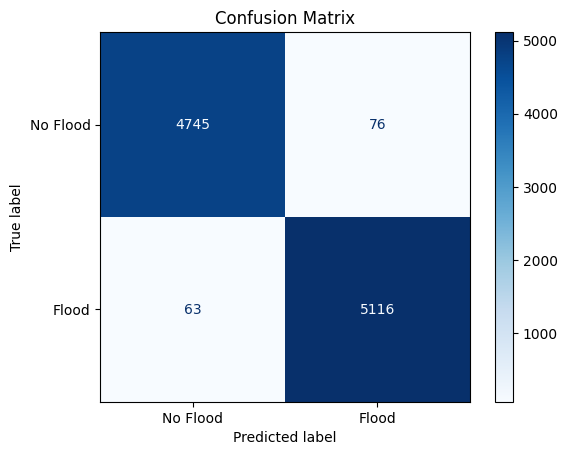

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4821
           1       0.99      0.99      0.99      5179

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
🌊 Predicted Flood Probability: 0.0000


In [ ]:
# 📦 Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

data = df
def cap_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower, upper)

# 🔍 Cap outliers for all numeric features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_features:
    cap_outliers(data, col)

# 🎯 Convert FloodProbability to binary class for classification
data['FloodProbability'] = data['FloodProbability'].apply(lambda x: 1 if x >= 0.5 else 0)

# 🔧 Splitting Features and Target
X = data.drop(columns=['FloodProbability'])
y = data['FloodProbability']

# 📊 Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧪 Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # sigmoid for probability output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ⏱️ Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 🚀 Model Training
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=256, validation_split=0.2, callbacks=[early_stopping])

# 📉 Evaluate Model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Model Loss: {loss:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

# 📈 Predict probabilities
y_probs = model.predict(X_test_scaled)
y_pred = (y_probs > 0.5).astype(int)

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Flood", "Flood"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 📄 Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 🌍 Predict flood probability for new input
def predict_flood_probability(input_data: dict):
    """
    Predict flood probability for a single input using the trained model.

    Args:
        input_data (dict): Feature dictionary with same keys as training data.

    Returns:
        float: Predicted flood probability (0.0 to 1.0)
    """
    try:
        input_df = pd.DataFrame([input_data])
        input_scaled = scaler.transform(input_df)
        probability = float(model.predict(input_scaled)[0][0])
        return round(probability, 4)
    except Exception as e:
        print(f"❌ Prediction error: {e}")
        return -1

# 🧪 Example input
example_input = {
    "MonsoonIntensity": 2,
    "TopographyDrainage": 8,
    "RiverManagement": 9,
    "Deforestation": 1,
    "Urbanization": 2,
    "ClimateChange": 2,
    "DamsQuality": 9,
    "Siltation": 1,
    "AgriculturalPractices": 8,
    "Encroachments": 1,
    "IneffectiveDisasterPreparedness": 1,
    "DrainageSystems": 9,
    "CoastalVulnerability": 1,
    "Landslides": 1,
    "Watersheds": 9,
    "DeterioratingInfrastructure": 1,
    "PopulationScore": 2,
    "WetlandLoss": 1,
    "InadequatePlanning": 1,
    "PoliticalFactors": 1
}

# 🔍 Predict
prob = predict_flood_probability(example_input)
if prob != -1:
    print(f"🌊 Predicted Flood Probability: {prob:.4f}")